In [3]:
# Import the dependencies.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import requests 

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Get Key for API
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.

lats=np.random.uniform(-90.000,90.000,size=1500)
lngs=np.random.uniform(-180.000,180.000,size=1500)

lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0],coordinate[1])

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    #print(coordinate[0])
    city=citipy.nearest_city(coordinate[0],coordinate[1])
    print(city.city_name,city.country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)  
#cities

584

In [8]:
# Import the time library and the datetime module from the datetime library 
city_data = []

In [9]:
# Starting URL for Weather Map API Call.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [27]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [28]:
# Loop through all the cities in our list.
# for i in cities.loc[5,:]:
#     print(cities)
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(city_url)
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=san+matias
Processing Record 1 of Set 1 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=komsomolskiy
Processing Record 2 of Set 1 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=mataura
Processing Record 3 of Set 1 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=busselton
Processing Record 4 of Set 1 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=albany
Processing Record 5 of Set 1 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=attawapiskat
Processing Record 6 of Set 1 | severo-yeniseyskiy
City not found. Skip

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=punta+arenas
Processing Record 1 of Set 2 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=esperance
Processing Record 2 of Set 2 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=lagoa
Processing Record 3 of Set 2 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=dunedin
Processing Record 4 of Set 2 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=lavrentiya
Processing Record 5 of Set 2 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=thompson
Processing Record 6 of Set 2 | severo-yeniseyskiy
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=balkhash
Processing Record 1 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=saldanha
Processing Record 2 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=talnakh
Processing Record 3 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=dikson
Processing Record 4 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=ous
Processing Record 5 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=sioux+lookout
Processing Record 6 of Set 3 | severo-yeniseyskiy
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=walvis+bay
Processing Record 1 of Set 4 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=rondonopolis
Processing Record 2 of Set 4 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=saint+george
Processing Record 3 of Set 4 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=hailey
Processing Record 4 of Set 4 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=bilibino
Processing Record 5 of Set 4 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=hithadhoo
Processing Record 6 of Set 4 | severo-yeniseyskiy
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=langfang
Processing Record 1 of Set 5 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=shingu
Processing Record 2 of Set 5 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=rochegda
Processing Record 3 of Set 5 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=sabana+grande+de+boya
Processing Record 4 of Set 5 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=chimore
Processing Record 5 of Set 5 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=cidreira
Processing Record 6 of Set 5 | severo-yeniseyskiy
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=calvinia
Processing Record 1 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=salalah
Processing Record 2 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=faanui
Processing Record 3 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=georgiyevka
Processing Record 4 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=sikandra
Processing Record 5 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=taree
Processing Record 6 of Set 6 | severo-yeniseyskiy
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=makat
Processing Record 1 of Set 7 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=grindavik
Processing Record 2 of Set 7 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=geylegphug
Processing Record 3 of Set 7 | severo-yeniseyskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=adrar
Processing Record 4 of Set 7 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=saint-augustin
Processing Record 5 of Set 7 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=deputatskiy
Processing Record 6 of Set 7 | severo-yenise

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=nouadhibou
Processing Record 50 of Set 7 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=nishihara
Processing Record 1 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=sawtell
Processing Record 2 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=muleba
Processing Record 3 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=lima
Processing Record 4 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=norman+wells
Processing Record 5 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=tabas
Processing Record 50 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=goba
Processing Record 1 of Set 9 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=verkhnyaya+inta
Processing Record 2 of Set 9 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=alofi
Processing Record 3 of Set 9 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=bin+qirdan
Processing Record 4 of Set 9 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=ngunguru
Processing Record 5 of Set 9 | severo-yeniseyskiy
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=champerico
Processing Record 50 of Set 9 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=jatiroto
Processing Record 1 of Set 10 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=tahta
Processing Record 2 of Set 10 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=ternate
Processing Record 3 of Set 10 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=vao
Processing Record 4 of Set 10 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=andenes
Processing Record 5 of Set 10 | severo-yeniseyskiy
http://api.openweathermap.org/

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=macamic
Processing Record 50 of Set 10 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=iraucuba
Processing Record 1 of Set 11 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=sinjai
Processing Record 2 of Set 11 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=sur
Processing Record 3 of Set 11 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=dustlik
Processing Record 4 of Set 11 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=jinchang
Processing Record 5 of Set 11 | severo-yeniseyskiy
ht

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=jomalig
Processing Record 50 of Set 11 | severo-yeniseyskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=megion
Processing Record 1 of Set 12 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=samana
Processing Record 2 of Set 12 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=kongolo
Processing Record 3 of Set 12 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=kipushi
Processing Record 4 of Set 12 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a74cdc43d619114fc1916f18e9fe4204&q=bugiri
Processing Record 5 of Set 12 | severo-yeniseyskiy
ht

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Yeniseyskiy,-16.3667,-58.4000,77.90,59,47,5.66,BO,2022-04-28 02:35:35
1,Severo-Yeniseyskiy,40.4272,71.7189,63.32,72,72,2.30,UZ,2022-04-28 02:35:35
2,Severo-Yeniseyskiy,-46.1927,168.8643,54.48,64,65,2.77,NZ,2022-04-28 02:35:35
3,Severo-Yeniseyskiy,-33.6500,115.3333,62.69,60,80,13.94,AU,2022-04-28 02:35:36
4,Severo-Yeniseyskiy,42.6001,-73.9662,39.16,64,17,3.00,US,2022-04-28 02:35:36
5,Severo-Yeniseyskiy,31.2156,29.9553,57.74,66,0,2.44,EG,2022-04-28 02:31:41
6,Severo-Yeniseyskiy,-21.3585,55.7679,72.21,77,0,2.51,RE,2022-04-28 02:35:37
7,Severo-Yeniseyskiy,34.6391,-120.4579,57.56,77,0,13.80,US,2022-04-28 02:35:37
8,Severo-Yeniseyskiy,-28.7667,114.6000,70.21,68,40,4.61,AU,2022-04-28 02:31:03
9,Severo-Yeniseyskiy,19.7297,-155.0900,80.28,85,100,8.05,US,2022-04-28 02:35:38


In [30]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        535 non-null    object 
 1   Lat         535 non-null    float64
 2   Lng         535 non-null    float64
 3   Max Temp    535 non-null    float64
 4   Humidity    535 non-null    int64  
 5   Cloudiness  535 non-null    int64  
 6   Wind Speed  535 non-null    float64
 7   Country     535 non-null    object 
 8   Date        535 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 37.7+ KB


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Yeniseyskiy,BO,2022-04-28 02:35:35,-16.3667,-58.4000,77.90,59,47,5.66
1,Severo-Yeniseyskiy,UZ,2022-04-28 02:35:35,40.4272,71.7189,63.32,72,72,2.30
2,Severo-Yeniseyskiy,NZ,2022-04-28 02:35:35,-46.1927,168.8643,54.48,64,65,2.77
3,Severo-Yeniseyskiy,AU,2022-04-28 02:35:36,-33.6500,115.3333,62.69,60,80,13.94
4,Severo-Yeniseyskiy,US,2022-04-28 02:35:36,42.6001,-73.9662,39.16,64,17,3.00
...,...,...,...,...,...,...,...,...,...
530,Severo-Yeniseyskiy,IT,2022-04-28 02:49:51,39.4244,8.9244,57.61,87,0,5.75
531,Severo-Yeniseyskiy,IN,2022-04-28 02:49:52,27.9500,77.8333,98.76,9,0,6.51
532,Severo-Yeniseyskiy,NP,2022-04-28 02:49:52,29.2747,82.1838,67.41,30,0,3.91
533,Severo-Yeniseyskiy,CA,2022-04-28 02:49:52,50.4998,-120.8025,44.44,57,81,4.92


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
output_data_file = "weather_data/cities.csv"
city_data_df=pd.read_csv(output_data_file,index_col="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Severo-Yeniseyskiy,BO,2022-04-28 02:35:35,-16.3667,-58.4000,77.90,59,47,5.66
1,Severo-Yeniseyskiy,UZ,2022-04-28 02:35:35,40.4272,71.7189,63.32,72,72,2.30
2,Severo-Yeniseyskiy,NZ,2022-04-28 02:35:35,-46.1927,168.8643,54.48,64,65,2.77
3,Severo-Yeniseyskiy,AU,2022-04-28 02:35:36,-33.6500,115.3333,62.69,60,80,13.94
4,Severo-Yeniseyskiy,US,2022-04-28 02:35:36,42.6001,-73.9662,39.16,64,17,3.00
...,...,...,...,...,...,...,...,...,...
530,Severo-Yeniseyskiy,IT,2022-04-28 02:49:51,39.4244,8.9244,57.61,87,0,5.75
531,Severo-Yeniseyskiy,IN,2022-04-28 02:49:52,27.9500,77.8333,98.76,9,0,6.51
532,Severo-Yeniseyskiy,NP,2022-04-28 02:49:52,29.2747,82.1838,67.41,30,0,3.91


In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

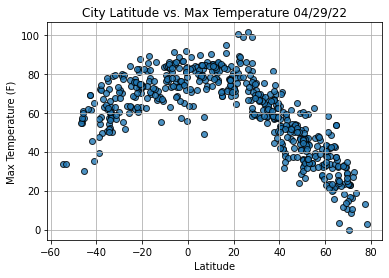

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%x")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

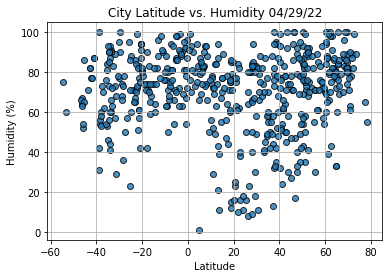

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()